<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Loading-and-Cleaning" data-toc-modified-id="Data-Loading-and-Cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Loading and Cleaning</a></span></li><li><span><a href="#Creating-matching-dataframes-for-year-1-and-year-2" data-toc-modified-id="Creating-matching-dataframes-for-year-1-and-year-2-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Creating matching dataframes for year 1 and year 2</a></span></li><li><span><a href="#Weekly-averages-dataframe-for-year-1-and-year-2" data-toc-modified-id="Weekly-averages-dataframe-for-year-1-and-year-2-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Weekly averages dataframe for year 1 and year 2</a></span></li><li><span><a href="#Graphing" data-toc-modified-id="Graphing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Graphing</a></span></li><li><span><a href="#Graphing-(method-2)" data-toc-modified-id="Graphing-(method-2)-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Graphing (method 2)</a></span></li><li><span><a href="#Data-distributions" data-toc-modified-id="Data-distributions-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Data distributions</a></span></li><li><span><a href="#Statistics" data-toc-modified-id="Statistics-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Statistics</a></span><ul class="toc-item"><li><span><a href="#Descriptive-statistics" data-toc-modified-id="Descriptive-statistics-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Descriptive statistics</a></span></li><li><span><a href="#T-tests" data-toc-modified-id="T-tests-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>T-tests</a></span></li><li><span><a href="#Covariance-of-two-years" data-toc-modified-id="Covariance-of-two-years-7.3"><span class="toc-item-num">7.3&nbsp;&nbsp;</span>Covariance of two years</a></span></li><li><span><a href="#Correlation-of-two-years" data-toc-modified-id="Correlation-of-two-years-7.4"><span class="toc-item-num">7.4&nbsp;&nbsp;</span>Correlation of two years</a></span></li><li><span><a href="#Augmented-Dickey-Fuller" data-toc-modified-id="Augmented-Dickey-Fuller-7.5"><span class="toc-item-num">7.5&nbsp;&nbsp;</span>Augmented Dickey-Fuller</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

# Data Loading and Cleaning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import scipy.signal
import seaborn as sns
import itertools

In [2]:
df = pd.read_csv('HassayampaBats20-21.csv')

In [3]:
df.sample(5)

,Date,iddate,ANTPAL,CORTOW,EPTFUS,EUDMAC,EUMPER,EUMUND,LASBLO,LASCIN,...,MYOVOL,MYOYUM,NYCFEM,NYCMAC,PARHES,TADBRA,NOID,TotBatDet,NOISE,Species
554,3/7/2021,SN493093 2021-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,8.0,53.0,2.0
252,5/9/2020,SN493093 2020-05-09,2.0,NaN,8.0,NaN,NaN,NaN,3.0,3.0,...,18.0,NaN,NaN,NaN,NaN,4.0,90.0,239.0,243.0,10.0
24,9/24/2019,SN493093 2019-09-24,1.0,NaN,3.0,NaN,NaN,NaN,4.0,10.0,...,1.0,NaN,1.0,NaN,28.0,65.0,39.0,198.0,282.0,10.0
658,6/19/2021,SN493093 2021-06-19,33.0,NaN,43.0,NaN,NaN,NaN,1.0,NaN,...,23.0,3.0,NaN,NaN,NaN,NaN,205.0,486.0,322.0,9.0
473,12/16/2020,SN493093 2020-12-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,7.0,0.0


In [4]:
df.shape

(690, 29)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 29 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       690 non-null    object 
 1   iddate     690 non-null    object 
 2   ANTPAL     210 non-null    float64
 3   CORTOW     35 non-null     float64
 4   EPTFUS     382 non-null    float64
 5   EUDMAC     0 non-null      float64
 6   EUMPER     0 non-null      float64
 7   EUMUND     31 non-null     float64
 8   LASBLO     133 non-null    float64
 9   LASCIN     337 non-null    float64
 10  LASNOC     440 non-null    float64
 11  LASXAN     175 non-null    float64
 12  MACCAL     2 non-null      float64
 13  MYOCAL     161 non-null    float64
 14  MYOCIL     322 non-null    float64
 15  MYOEVO     23 non-null     float64
 16  MYOOCC     20 non-null     float64
 17  MYOTHY     3 non-null      float64
 18  MYOVEL     359 non-null    float64
 19  MYOVOL     251 non-null    float64
 20  MYOYUM    

In [6]:
#Drop species with 25 or less detections, these are also species that could not be verified. Also drop iddate.
df = df.drop(columns = ['EUDMAC', 'EUMPER', 'MACCAL', 'MYOEVO', 'MYOOCC', 'MYOTHY'])

df = df.drop(df.index[0])

In [7]:
#Change date time format
df['Date'] = pd.to_datetime(df['Date']).dt.date
df['Date'] = pd.to_datetime(df['Date'])

In [8]:
#Sum all detections for both years worth of data
df.sum()

iddate       SN493093 2019-09-01SN493093 2019-09-02SN493093...
ANTPAL                                                    2663
CORTOW                                                      47
EPTFUS                                                   11249
EUMUND                                                      48
LASBLO                                                     375
LASCIN                                                    3134
LASNOC                                                    5373
LASXAN                                                     573
MYOCAL                                                     364
MYOCIL                                                    4713
MYOVEL                                                   12586
MYOVOL                                                    1684
MYOYUM                                                     181
NYCFEM                                                     428
NYCMAC                                                 

In [9]:
#See how many days are missing from the two years
(df['iddate'] == 'missing').value_counts()

False    668
True      21
Name: iddate, dtype: int64

In [10]:
#Make feature of month of detection
df['month'] = pd.DatetimeIndex(df['Date']).month

In [11]:
#See how many days there are of each month in the data
df['month'].value_counts().sort_index()

1     62
2     57
3     62
4     60
5     62
6     60
7     51
8     31
9     60
10    62
11    60
12    62
Name: month, dtype: int64

In [12]:
#Fill NA with 0
df = df.fillna(value = 0)

# Creating matching dataframes for year 1 and year 2

In [13]:
df.index = df['Date']

In [14]:
#Create dataframes where both years start on 9-1. 
year1 = df[df.index < '2020-09-01']
year2 = df[df.index >= '2020-09-01']
print('year 1 shape', year1.shape)
print('year 2 shape', year2.shape)

year 1 shape (366, 24)
year 2 shape (323, 24)


In [15]:
#Create a day of year (doy) with 1st day being 9-1 being that was the first day of sampling. 
year1['doy'] = list(range(1, len(year1)+1, 1))
year2['doy'] = list(range(1, len(year2)+1, 1))

<ipython-input-15-9dd60a0ede97>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1['doy'] = list(range(1, len(year1)+1, 1))
<ipython-input-15-9dd60a0ede97>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2['doy'] = list(range(1, len(year2)+1, 1))


In [16]:
#Create a list for week of year each day of year is found in
x = list(itertools.chain.from_iterable(itertools.repeat(i, 7) for i in list(range(1, 54, 1))))
y1 = x[:(len(year1))]
y2 = x[:(len(year2))]

In [17]:
#Create week of year (woy) column in each dataframe
year1['woy'] = y1
year2['woy'] = y2

<ipython-input-17-418aa7784a1c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year1['woy'] = y1
<ipython-input-17-418aa7784a1c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  year2['woy'] = y2


In [18]:
#Create a list of missing days of year
y1m = list(year1[year1['iddate'] == 'missing']['doy']) 
y2m = list(year2[year2['iddate'] == 'missing']['doy'])
ym = y1m + y2m

In [19]:
#dropping days that were not in the second year from the first year
year1 = year1[year1['doy'] <= 323]

In [20]:
print(max(year1['doy']))
print(max(year2['doy']))

323
323


In [21]:
year1.index = year1.doy
year2.index = year2.doy

In [22]:
#dropping days of missing data from both dataframes
year1 = year1.drop(ym)
year2 = year2.drop(ym)

In [23]:
#both dataframes now are the same length and have the same days of data for each year.
print(len(year1['doy']))
print(len(year2['doy']))

302
302


In [24]:
year1.columns

Index(['Date', 'iddate', 'ANTPAL', 'CORTOW', 'EPTFUS', 'EUMUND', 'LASBLO',
       'LASCIN', 'LASNOC', 'LASXAN', 'MYOCAL', 'MYOCIL', 'MYOVEL', 'MYOVOL',
       'MYOYUM', 'NYCFEM', 'NYCMAC', 'PARHES', 'TADBRA', 'NOID', 'TotBatDet',
       'NOISE', 'Species', 'month', 'doy', 'woy'],
      dtype='object')

In [80]:
sp = ['ANTPAL', 'CORTOW', 'EPTFUS', 'EUMUND', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCAL', 
      'MYOCIL', 'MYOVEL', 'MYOVOL', 'MYOYUM', 'NYCFEM', 'NYCMAC',
      'PARHES', 'TADBRA', 'Species', 'TotBatDet']
y1, y2, n1, n2 = [], [], [], []

for i in sp:
    y1.append(int(sum(year1[i])))
    y2.append(int(sum(year2[i])))
    n1.append(sum(year1[i] > 0))
    n2.append(sum(year2[i] > 0))

sums = pd.DataFrame()
sums['Species'] = sp
sums['Year 1 Total Detections'] = y1
sums['Year 1 % Nights Detected'] = n1
sums['Year 2 Total Detections'] = y2
sums['Year 2 % Nights Detected'] = n2
sums['Year 1 % Nights Detected'] = round(sums['Year 1 % Nights Detected']/302 * 100, 1)
sums['Year 2 % Nights Detected'] = round(sums['Year 2 % Nights Detected']/302 * 100, 1)

sums.sort_values(by = ['Year 2 Total Detections'], ascending=False)

,Species,Year 1 Total Detections,Year 1 % Nights Detected,Year 2 Total Detections,Year 2 % Nights Detected
18,TotBatDet,36861,91.1,29241,93.7
2,EPTFUS,4309,57.6,4731,52.3
16,TADBRA,4378,68.5,3284,61.3
10,MYOVEL,6607,51.0,2764,51.7
9,MYOCIL,1866,46.4,2160,43.7
0,ANTPAL,456,28.1,1925,26.8
17,Species,1695,87.4,1560,91.1
5,LASCIN,1015,55.6,1555,40.7
6,LASNOC,2156,62.3,1479,65.9
11,MYOVOL,835,38.4,477,28.8


# Weekly averages dataframe for year 1 and year 2

In [26]:
#Get rid of rows of missing data
df = df[df['iddate'] != 'missing']

In [27]:
#Make weekly average dataframe
weekly = df.resample('W', on='Date').mean()
#Make column of data.
weekly['Date'] = weekly.index
#Fill NA with 0
#weekly = weekly.fillna(value = 0)

In [28]:
weekly.shape

(100, 23)

In [29]:
weekly1 = weekly[weekly.index < '2020-08-30']
weekly2 = weekly[weekly.index >= '2020-08-30']
print('Weekly 1 shape', weekly1.shape)
print('Weekly 2 shape', weekly2.shape)

Weekly 1 shape (52, 23)
Weekly 2 shape (48, 23)


In [30]:
weekly1['Week'] = list(range(1, 53, 1))
weekly2['Week'] = list(range(1, 49, 1))

<ipython-input-30-16e80f3a0648>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly1['Week'] = list(range(1, 53, 1))
<ipython-input-30-16e80f3a0648>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weekly2['Week'] = list(range(1, 49, 1))


# Graphing

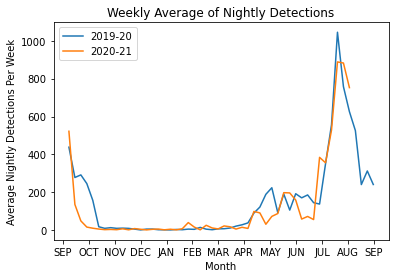

In [31]:
#Plotting weekly average of total bat detections.
plt.plot(weekly1.Week, weekly1.TotBatDet, label = '2019-20')
plt.plot(weekly2.Week, weekly2.TotBatDet, label = '2020-21')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections')
ax = plt.gca()
plt.xticks(np.arange(0, 53, 4.34), ('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

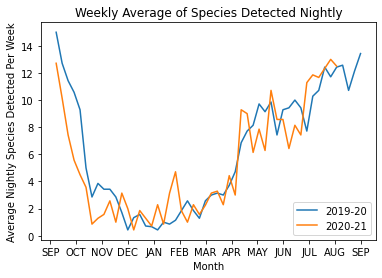

In [32]:
#Plotting average number of species detected weekly.
plt.plot(weekly1.Week, weekly1.Species, label = '2019-20')
plt.plot(weekly2.Week, weekly2.Species, label = '2020-21')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Species Detected Per Week')
plt.title('Weekly Average of Species Detected Nightly')
ax = plt.gca()
plt.xticks(np.arange(0, 53, 4.34), ('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

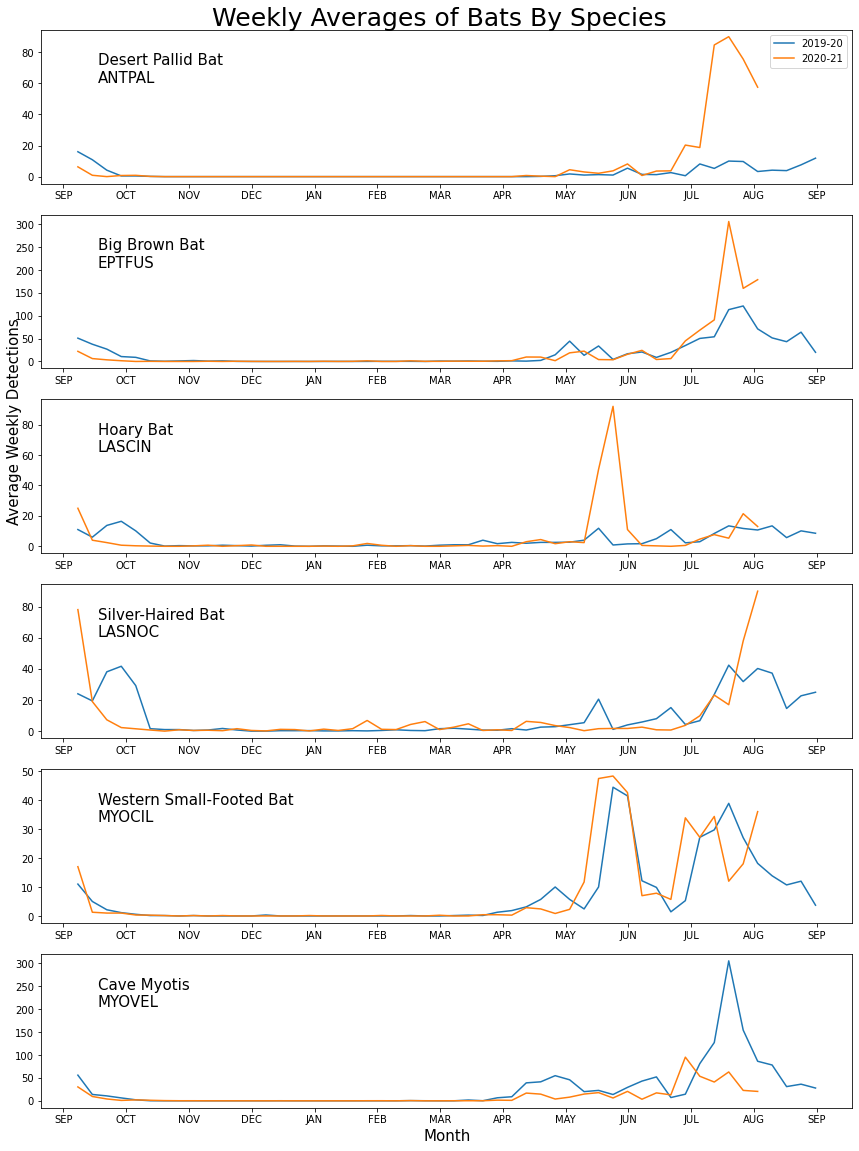

In [33]:
#Plotting the most common species and species of interest.

fig, (ax3, ax4, ax5, ax6, ax7, ax8) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(0.0000000001, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#ANTPAL
ax3.plot(weekly1.Week, weekly1.ANTPAL, label = '2019-20')
ax3.plot(weekly2.Week, weekly2.ANTPAL, label = '2020-21')
ax3.legend(loc="upper right")
ax3.text(0.07, 0.85, 'Desert Pallid Bat \nANTPAL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax3.transAxes)
ax3.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax3.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#EPTFUS
ax4.plot(weekly1.Week, weekly1.EPTFUS, label = 'Weekly')
ax4.plot(weekly2.Week, weekly2.EPTFUS, label = 'Weekly')
ax4.text(0.07, 0.85, 'Big Brown Bat \nEPTFUS', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax4.transAxes)
ax4.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax4.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#LASCIN
ax5.plot(weekly1.Week, weekly1.LASCIN, label = 'Weekly')
ax5.plot(weekly2.Week, weekly2.LASCIN, label = 'Weekly')
ax5.text(0.07, 0.85, 'Hoary Bat \nLASCIN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax5.transAxes)
ax5.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax5.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#LASNOC
ax6.plot(weekly1.Week, weekly1.LASNOC, label = 'Weekly')
ax6.plot(weekly2.Week, weekly2.LASNOC)
ax6.text(0.07, 0.85, 'Silver-Haired Bat \nLASNOC', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax6.transAxes)
ax6.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax6.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#MYOCIL
ax7.plot(weekly1.Week, weekly1.MYOCIL, label = 'Weekly')
ax7.plot(weekly2.Week, weekly2.MYOCIL)
ax7.text(0.07, 0.85, 'Western Small-Footed Bat \nMYOCIL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax7.transAxes)
ax7.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax7.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#MYOVEL
ax8.plot(weekly1.Week, weekly1.MYOVEL, label = 'Weekly')
ax8.plot(weekly2.Week, weekly2.MYOVEL)
ax8.text(0.07, 0.85, 'Cave Myotis \nMYOVEL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax8.transAxes)
ax8.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax8.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)

plt.show()

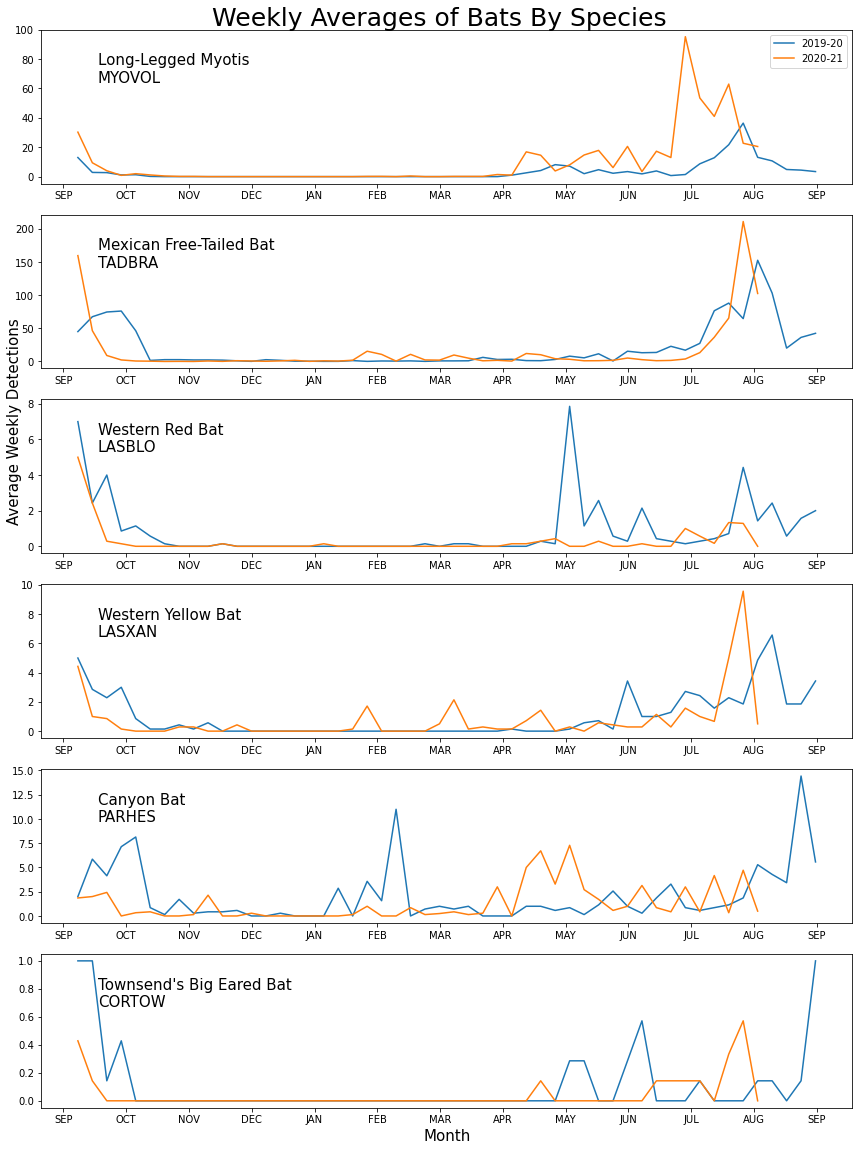

In [34]:
#Plotting the most common species and species of interest.  
#Two different subplots for better viewing of data.

fig, (ax9, ax10, ax11, ax12, ax13, ax14) = plt.subplots(6, 1, figsize=(12,16))
fig.suptitle('Weekly Averages of Bats By Species', fontsize=25)
fig.tight_layout()
fig.subplots_adjust(top=0.96)
plt.xlabel("Month", fontsize = '15')
fig.text(0.0000000001, 0.62, 'Average Weekly Detections', va='center', rotation='vertical', fontsize = 15)

#MYOVOL
ax9.plot(weekly1.Week, weekly1.MYOVOL, label = '2019-20')
ax9.plot(weekly2.Week, weekly2.MYOVEL, label = '2020-21')
ax9.legend(loc="upper right")
ax9.text(0.07, 0.85, 'Long-Legged Myotis \nMYOVOL', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax9.transAxes)
ax9.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax9.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#TADBRA
ax10.plot(weekly1.Week, weekly1.TADBRA, label = '2019-20')
ax10.plot(weekly2.Week, weekly2.TADBRA, label = '2020-21')
ax10.text(0.07, 0.85, 'Mexican Free-Tailed Bat \nTADBRA', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax10.transAxes)
ax10.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax10.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#LASBLO
ax11.plot(weekly1.Week, weekly1.LASBLO, label = 'Weekly')
ax11.plot(weekly2.Week, weekly2.LASBLO)
ax11.text(0.07, 0.85, 'Western Red Bat \nLASBLO', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax11.transAxes)
ax11.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax11.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#LASXAN
ax12.plot(weekly1.Week, weekly1.LASXAN, label = 'Weekly')
ax12.plot(weekly2.Week, weekly2.LASXAN)
ax12.text(0.07, 0.85, 'Western Yellow Bat \nLASXAN', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax12.transAxes)
ax12.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax12.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#PARHES
ax13.plot(weekly1.Week, weekly1.PARHES, label = 'Weekly')
ax13.plot(weekly2.Week, weekly2.PARHES)
ax13.text(0.07, 0.85, 'Canyon Bat \nPARHES', fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax13.transAxes)
ax13.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax13.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


#CORTOW
ax14.plot(weekly1.Week, weekly1.CORTOW, label = 'Weekly')
ax14.plot(weekly2.Week, weekly2.CORTOW)
plt.xlabel('Month')
ax14.text(0.07, 0.85, "Townsend's Big Eared Bat \nCORTOW", fontsize = 15, horizontalalignment='left', verticalalignment='top', transform=ax14.transAxes)
ax14.set_xticks(np.arange(0, 53, 4.34), minor=False)
ax14.set_xticklabels(('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'), fontdict=None, minor=False)


plt.show()

# Graphing (method 2)

In [35]:
y1w = year1.groupby(year1['woy']).mean()
y2w = year2.groupby(year2['woy']).mean()

In [36]:
print(len(y1w))
print(len(y1w))

47
47


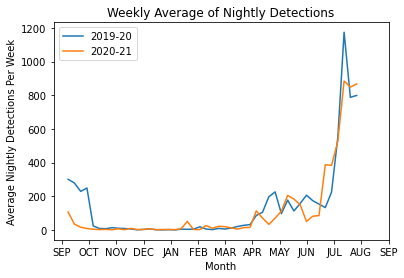

In [37]:
plt.plot(y1w.TotBatDet, label = '2019-20')
plt.plot(y2w.TotBatDet, label = '2020-21')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Detections Per Week')
plt.title('Weekly Average of Nightly Detections')
ax = plt.gca()
plt.xticks(np.arange(0, 53, 4.34), ('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

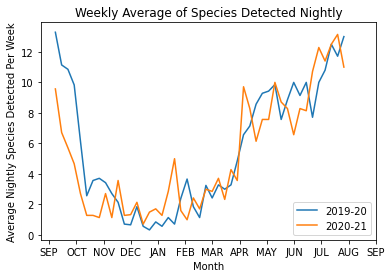

In [38]:
#Plotting average number of species detected weekly.
plt.plot(y1w.Species, label = '2019-20')
plt.plot(y2w.Species, label = '2020-21')
plt.legend()
plt.xlabel('Month')
plt.ylabel('Average Nightly Species Detected Per Week')
plt.title('Weekly Average of Species Detected Nightly')
ax = plt.gca()
plt.xticks(np.arange(0, 53, 4.34), ('SEP', 'OCT', 'NOV', 'DEC', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP'))
plt.show()

Will retain graphs used in section 4 and not these found in section 5.  This is due to the additional data retained in section 4.

# Data distributions

In [39]:
#Dataframes for daily comparison stats
print(len(year1))
print(len(year2))

302
302


In [40]:
#Dataframes for weekly averages comparison stats
print(len(y1w))
print(len(y2w))

47
47


In [41]:
#Dataframes for monthly averages comparison stats, both will be missing month 8 due to second year samplind ending in month 7.
y1m = year1.groupby(['month']).mean()
y2m = year2.groupby(['month']).mean()
print(len(y1m))
print(len(y2m))

11
11


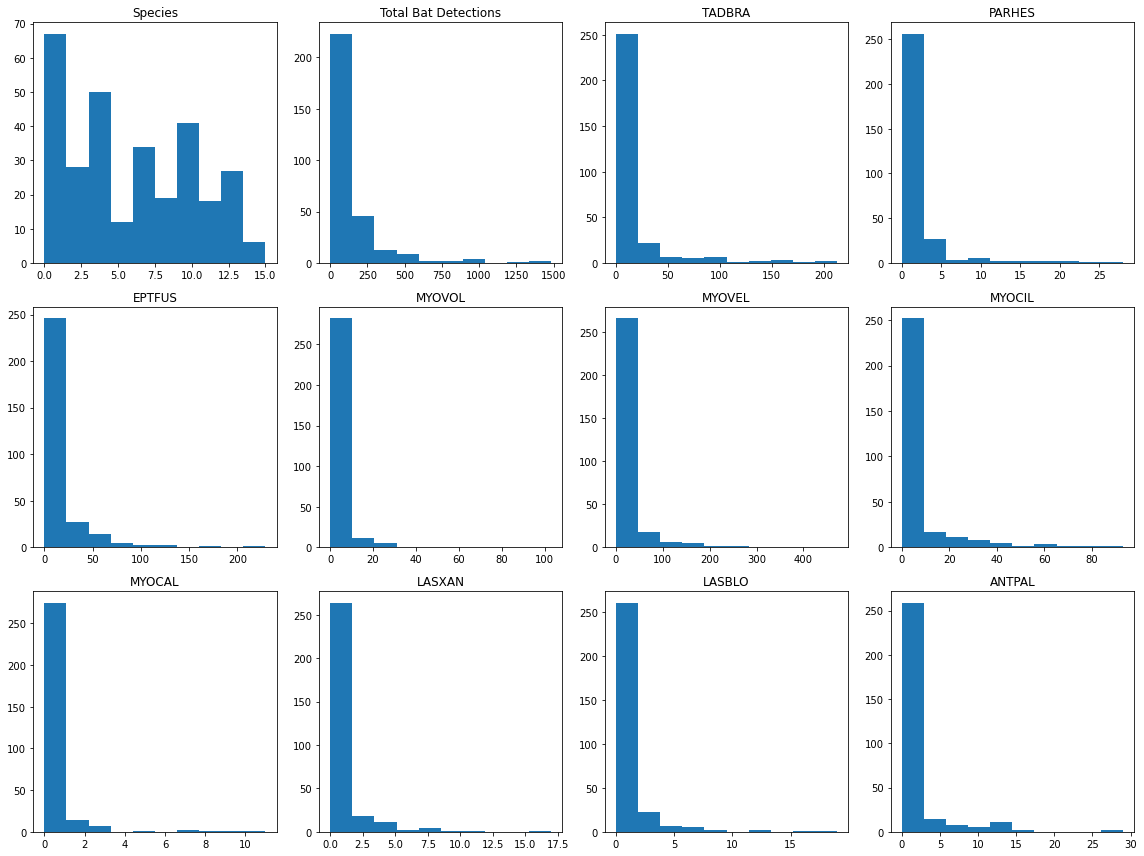

In [42]:
plt.figure(figsize=(16,12))
plt.subplot(3, 4, 1)
plt.hist(year1.Species)
plt.title('Species')
plt.subplot(3, 4, 2)
plt.hist(year1.TotBatDet)
plt.title('Total Bat Detections')
plt.subplot(3, 4, 3)
plt.hist(year1.TADBRA)
plt.title('TADBRA')
plt.subplot(3, 4, 4)
plt.hist(year1.PARHES)
plt.title('PARHES')
plt.subplot(3, 4, 5)
plt.hist(year1.EPTFUS)
plt.title('EPTFUS')
plt.subplot(3, 4, 6)
plt.hist(year1.MYOVOL)
plt.title('MYOVOL')
plt.subplot(3, 4, 7)
plt.hist(year1.MYOVEL)
plt.title('MYOVEL')
plt.subplot(3, 4, 8)
plt.hist(year1.MYOCIL)
plt.title('MYOCIL')
plt.subplot(3, 4, 9)
plt.hist(year1.MYOCAL)
plt.title('MYOCAL')
plt.subplot(3, 4, 10)
plt.hist(year1.LASXAN)
plt.title('LASXAN')
plt.subplot(3, 4, 11)
plt.hist(year1.LASBLO)
plt.title('LASBLO')
plt.subplot(3, 4, 12)
plt.hist(year1.ANTPAL)
plt.title('ANTPAL')
plt.tight_layout()
plt.show()

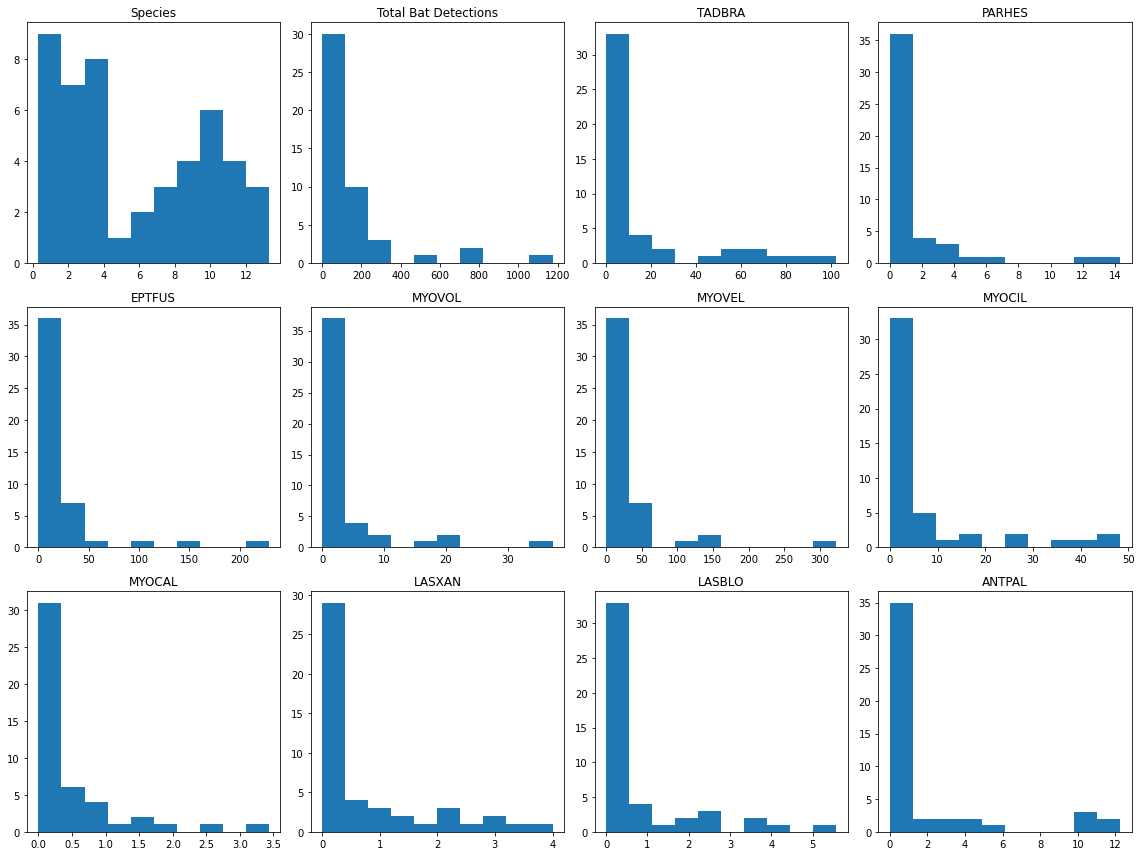

In [43]:
plt.figure(figsize=(16,12))
plt.subplot(3, 4, 1)
plt.hist(y1w.Species)
plt.title('Species')
plt.subplot(3, 4, 2)
plt.hist(y1w.TotBatDet)
plt.title('Total Bat Detections')
plt.subplot(3, 4, 3)
plt.hist(y1w.TADBRA)
plt.title('TADBRA')
plt.subplot(3, 4, 4)
plt.hist(y1w.PARHES)
plt.title('PARHES')
plt.subplot(3, 4, 5)
plt.hist(y1w.EPTFUS)
plt.title('EPTFUS')
plt.subplot(3, 4, 6)
plt.hist(y1w.MYOVOL)
plt.title('MYOVOL')
plt.subplot(3, 4, 7)
plt.hist(y1w.MYOVEL)
plt.title('MYOVEL')
plt.subplot(3, 4, 8)
plt.hist(y1w.MYOCIL)
plt.title('MYOCIL')
plt.subplot(3, 4, 9)
plt.hist(y1w.MYOCAL)
plt.title('MYOCAL')
plt.subplot(3, 4, 10)
plt.hist(y1w.LASXAN)
plt.title('LASXAN')
plt.subplot(3, 4, 11)
plt.hist(y1w.LASBLO)
plt.title('LASBLO')
plt.subplot(3, 4, 12)
plt.hist(y1w.ANTPAL)
plt.title('ANTPAL')
plt.tight_layout()
plt.show()

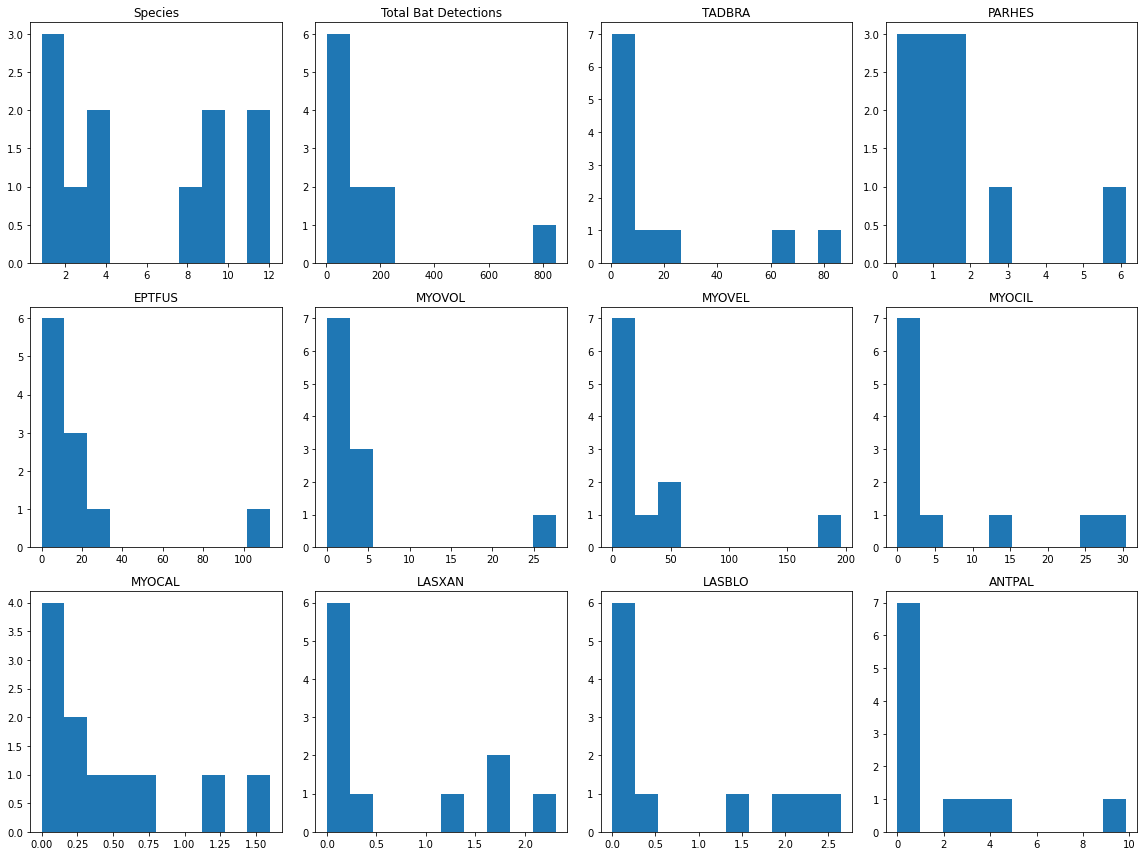

In [44]:
plt.figure(figsize=(16,12))
plt.subplot(3, 4, 1)
plt.hist(y1m.Species)
plt.title('Species')
plt.subplot(3, 4, 2)
plt.hist(y1m.TotBatDet)
plt.title('Total Bat Detections')
plt.subplot(3, 4, 3)
plt.hist(y1m.TADBRA)
plt.title('TADBRA')
plt.subplot(3, 4, 4)
plt.hist(y1m.PARHES)
plt.title('PARHES')
plt.subplot(3, 4, 5)
plt.hist(y1m.EPTFUS)
plt.title('EPTFUS')
plt.subplot(3, 4, 6)
plt.hist(y1m.MYOVOL)
plt.title('MYOVOL')
plt.subplot(3, 4, 7)
plt.hist(y1m.MYOVEL)
plt.title('MYOVEL')
plt.subplot(3, 4, 8)
plt.hist(y1m.MYOCIL)
plt.title('MYOCIL')
plt.subplot(3, 4, 9)
plt.hist(y1m.MYOCAL)
plt.title('MYOCAL')
plt.subplot(3, 4, 10)
plt.hist(y1m.LASXAN)
plt.title('LASXAN')
plt.subplot(3, 4, 11)
plt.hist(y1m.LASBLO)
plt.title('LASBLO')
plt.subplot(3, 4, 12)
plt.hist(y1m.ANTPAL)
plt.title('ANTPAL')
plt.tight_layout()
plt.show()

All data appears to have strong non-normal distributions.

# Statistics

## Descriptive statistics

In [45]:
#Descriptive statistics
des_stats = pd.DataFrame()

des_stats['mean1'] = year1.mean()
des_stats['mean2'] = year2.mean()
des_stats['med1'] = year1.median()
des_stats['med2'] = year2.median()
des_stats['var1'] = year1.var()
des_stats['var2'] = year2.var()
des_stats['std1'] = year1.std()
des_stats['std2'] = year2.std()
des_stats['se1'] = year1.sem()
des_stats['se2'] = year2.sem()

des_stats = des_stats.drop(index = ['NYCFEM', 'NOID', 'NYCFEM', 'NYCMAC', 'NOISE', 'month', 'doy', 'woy', 'EUMUND'])

<ipython-input-45-64002b2de5e7>:4: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  des_stats['mean1'] = year1.mean()
<ipython-input-45-64002b2de5e7>:5: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  des_stats['mean2'] = year2.mean()
<ipython-input-45-64002b2de5e7>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  des_stats['med1'] = year1.median()
<ipython-input-45-64002b2de5e7>:7: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  des_stats['med2'] = year2.median()


In [46]:
des_stats

,mean1,mean2,med1,med2,var1,var2,std1,std2,se1,se2
ANTPAL,1.509934,6.374172,0.0,0.0,14.589602,603.583783,3.819634,24.567942,0.219795,1.413726
CORTOW,0.076159,0.036424,0.0,0.0,0.123749,0.055147,0.351779,0.234835,0.020243,0.013513
EPTFUS,14.268212,15.665563,1.0,1.0,950.947757,2293.532299,30.837441,47.890837,1.774495,2.755808
LASBLO,0.745033,0.152318,0.0,0.0,4.808530,0.328882,2.192836,0.573482,0.126184,0.033000
LASCIN,3.360927,5.149007,1.0,0.0,45.135080,434.386361,6.718265,20.841938,0.386593,1.199319
LASNOC,7.139073,4.897351,1.0,1.0,245.249697,190.796737,15.660450,13.812919,0.901158,0.794844
LASXAN,0.655629,0.655629,0.0,0.0,3.243141,7.136829,1.800872,2.671484,0.103629,0.153727
MYOCAL,0.433775,0.632450,0.0,0.0,1.615201,2.625256,1.270906,1.620264,0.073132,0.093236
MYOCIL,6.178808,7.152318,0.0,0.0,195.954632,271.418583,13.998380,16.474786,0.805516,0.948017
MYOVEL,21.877483,9.152318,1.0,1.0,2852.526468,464.328882,53.409049,21.548292,3.073345,1.239965


In [47]:
common = des_stats.loc[['MYOVEL', 'ANTPAL', 'EPTFUS', 'LASCIN', 'LASNOC', 'MYOCIL', 'TADBRA']]
rare = des_stats.loc[['MYOVOL', 'LASBLO', 'LASXAN', 'PARHES', 'CORTOW', 'MYOYUM']]

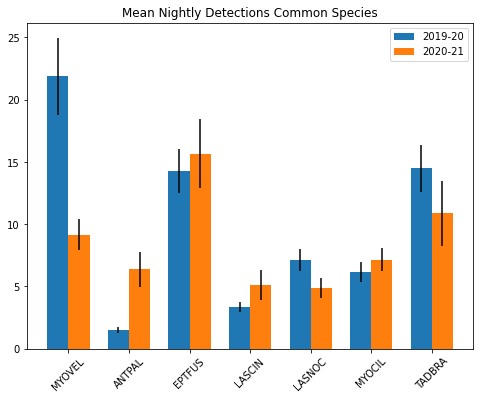

In [48]:
x = np.arange(len(common.index))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(x - 0.35/2, common.mean1, 0.35, yerr=common.se1, label='2019-20')
ax.bar(x + 0.35/2, common.mean2, 0.35, yerr=common.se2, label='2020-21')
ax.set_title('Mean Nightly Detections Common Species')
ax.set_xticks(x)
ax.set_xticklabels(common.index, rotation=45)
ax.legend()
plt.show()

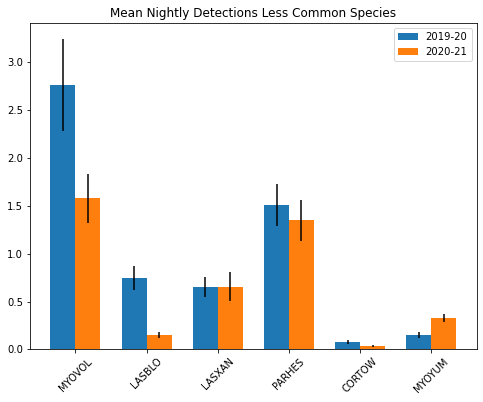

In [49]:
r = np.arange(len(rare.index))

fig, ax = plt.subplots(figsize=(8,6))
ax.bar(r - 0.35/2, rare.mean1, 0.35, yerr=rare.se1, label='2019-20')
ax.bar(r + 0.35/2, rare.mean2, 0.35, yerr=rare.se2, label='2020-21')
ax.set_title('Mean Nightly Detections Less Common Species')
ax.set_xticks(r)
ax.set_xticklabels(rare.index, rotation=45)
ax.legend()

#fig.tight_layout()

plt.show()

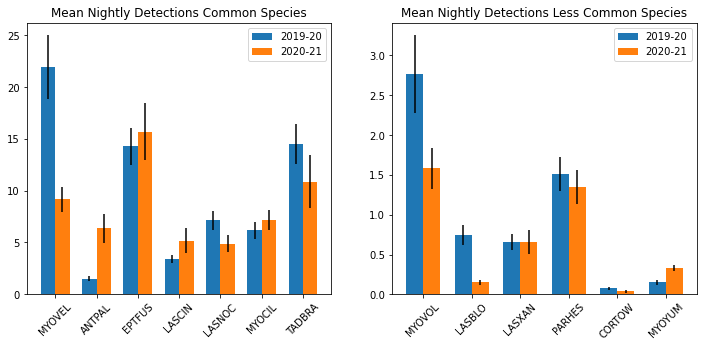

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

x = np.arange(len(common.index))

#fig, ax = plt.subplots(figsize=(8,6))
ax1.bar(x - 0.35/2, common.mean1, 0.35, yerr=common.se1, label = '2019-20')
ax1.bar(x + 0.35/2, common.mean2, 0.35, yerr=common.se2, label = '2020-21')
ax1.set_title('Mean Nightly Detections Common Species')
ax1.set_xticks(x)
ax1.set_xticklabels(common.index, rotation=45)
ax1.legend()

r = np.arange(len(rare.index))

#fig, ax = plt.subplots(figsize=(8,6))
ax2.bar(r - 0.35/2, rare.mean1, 0.35, yerr=rare.se1, label = '2019-20')
ax2.bar(r + 0.35/2, rare.mean2, 0.35, yerr=rare.se2, label = '2020-21')
ax2.set_title('Mean Nightly Detections Less Common Species')
ax2.set_xticks(r)
ax2.set_xticklabels(rare.index, rotation=45)
ax2.legend()

plt.show()

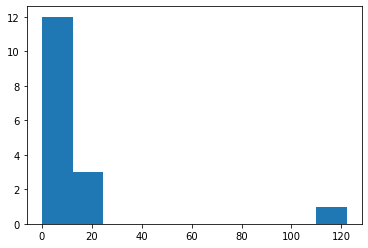

In [51]:
plt.hist(des_stats.mean1)
plt.show()

Means have non-normal distributions.

## T-tests

In [52]:
from scipy.stats import mannwhitneyu  #Unpaired, non-parametric test
stat, p = mannwhitneyu(des_stats.mean1, des_stats.mean2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=125.000, p=0.462


In [53]:
from scipy.stats import wilcoxon  #Paired, non-parametric test
stat, p = wilcoxon(des_stats.mean1, des_stats.mean2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=46.000, p=0.427


C:\Users\matta\anaconda3\lib\site-packages\scipy\stats\morestats.py:2958: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


In [54]:
from scipy.stats import ttest_rel  #Paired, parametric test
stat, p = ttest_rel(des_stats.mean1, des_stats.mean2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=1.291, p=0.216


In [55]:
from scipy.stats import ttest_ind  #Unpaired, parametric test
stat, p = ttest_ind(des_stats.mean1, des_stats.mean2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=0.243, p=0.810


Overall, there is no statistically significant difference in the bat community between year 1 and year 2.

In [56]:
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
stats = pd.DataFrame()

mwp, wp, pt, t = [], [], [], []

#Compare difference in detections between year 1 and year 2
for i in sp:
    stat, mw = mannwhitneyu(year1[i], year2[i])  
    mwp.append(round(mw, 5))
    stat, w = wilcoxon(year1[i], year2[i])  
    wp.append(round(w, 5))
    stat, tt = ttest_rel(year1[i], year2[i])  
    pt.append(round(tt, 5))
    stat, ptt = ttest_ind(year1[i], year2[i])  
    t.append(round(ptt, 5))

stats['Species'] = sp
stats['mwp'] = mwp
stats['mwpsig'] = stats['mwp'] <= 0.01
stats['wp'] = wp
stats['wpsig'] = stats['wp'] <= 0.01
stats['pt'] = pt
stats['ptsig'] = stats['pt'] <= 0.01
stats['t'] = t
stats['tsig'] = stats['t'] <= 0.01


In [57]:
stats

,Species,mwp,mwpsig,wp,wpsig,pt,ptsig,t,tsig
0,ANTPAL,0.47080,False,0.00100,True,0.00028,True,0.00072,True
1,CORTOW,0.07352,False,0.08040,False,0.10893,False,0.10308,False
2,MYOYUM,0.00002,True,0.00013,True,0.00078,True,0.00109,True
3,EPTFUS,0.02432,False,0.01417,False,0.45076,False,0.67003,False
4,LASBLO,0.00000,True,0.00000,True,0.00000,True,0.00001,True
5,LASCIN,0.00017,True,0.01144,False,0.13597,False,0.15641,False
6,LASNOC,0.15759,False,0.01601,False,0.03082,False,0.06258,False
7,LASXAN,0.19033,False,0.31510,False,1.00000,False,1.00000,False
8,MYOCIL,0.29335,False,0.92892,False,0.24852,False,0.43420,False
9,MYOVEL,0.03006,False,0.00000,True,0.00002,True,0.00014,True


In [58]:
print('mann-whit', sum(stats['mwpsig'] == True))
print('wilcox', sum(stats['wpsig'] == True))
print('paired t', sum(stats['ptsig'] == True))
print('t test', sum(stats['tsig'] == True))

mann-whit 5
wilcox 7
paired t 5
t test 4


In [59]:
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
wstats = pd.DataFrame()

mwp, wp, pt, t = [], [], [], []

#Compare difference in detections between year 1 and year 2
for i in sp:
    stat, mw = mannwhitneyu(y1w[i], y2w[i])  
    mwp.append(round(mw, 5))
    #stat, w = wilcoxon(y1w[i], y1w[i])  
    #wp.append(round(w, 5))
    stat, tt = ttest_rel(y1w[i], y2w[i])  
    pt.append(round(tt, 5))
    stat, ptt = ttest_ind(y1w[i], y2w[i])  
    t.append(round(ptt, 5))

wstats['Species'] = sp
wstats['mwp'] = mwp
wstats['mwpsig'] = wstats['mwp'] <= 0.05
#wstats['wp'] = wp
#wstats['wpsig'] = wstats['wp'] <= 0.05
wstats['pt'] = pt
wstats['ptsig'] = wstats['pt'] <= 0.05
wstats['t'] = t
wstats['tsig'] = wstats['t'] <= 0.05


In [60]:
wstats

,Species,mwp,mwpsig,pt,ptsig,t,tsig
0,ANTPAL,0.34895,False,0.02917,True,0.05159,False
1,CORTOW,0.30984,False,0.44006,False,0.44501,False
2,MYOYUM,0.02017,True,0.05066,False,0.07472,False
3,EPTFUS,0.23204,False,0.64055,False,0.85106,False
4,LASBLO,0.00576,True,0.00209,True,0.00364,True
5,LASCIN,0.02103,True,0.39763,False,0.43723,False
6,LASNOC,0.47888,False,0.72431,False,0.78077,False
7,LASXAN,0.46499,False,0.86498,False,0.87593,False
8,MYOCIL,0.47537,False,0.63840,False,0.79782,False
9,MYOVEL,0.26431,False,0.02513,True,0.05645,False


In [61]:
print('mann-whit', sum(wstats['mwpsig'] == True))
#print('wilcox', sum(wstats['wpsig'] == True))
print('paired t', sum(wstats['ptsig'] == True))
print('t test', sum(wstats['tsig'] == True))

mann-whit 3
paired t 3
t test 1


In [62]:
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
mstats = pd.DataFrame()

mwp, wp, pt, t = [], [], [], []

#Compare difference in detections between year 1 and year 2
for i in sp:
    stat, mw = mannwhitneyu(y1m[i], y2m[i])  
    mwp.append(round(mw, 5))
    #stat, w = wilcoxon(y1m[i], y1m[i])  
    #wp.append(round(w, 5))
    stat, tt = ttest_rel(y1m[i], y2m[i])  
    pt.append(round(tt, 5))
    stat, ptt = ttest_ind(y1m[i], y2m[i])  
    t.append(round(ptt, 5))

mstats['Species'] = sp
mstats['mwp'] = mwp
mstats['mwpsig'] = mstats['mwp'] <= 0.05
#wstats['wp'] = wp
#wstats['wpsig'] = mstats['wp'] <= 0.05
mstats['pt'] = pt
mstats['ptsig'] = mstats['pt'] <= 0.05
mstats['t'] = t
mstats['tsig'] = mstats['t'] <= 0.05


In [63]:
wstats

,Species,mwp,mwpsig,pt,ptsig,t,tsig
0,ANTPAL,0.34895,False,0.02917,True,0.05159,False
1,CORTOW,0.30984,False,0.44006,False,0.44501,False
2,MYOYUM,0.02017,True,0.05066,False,0.07472,False
3,EPTFUS,0.23204,False,0.64055,False,0.85106,False
4,LASBLO,0.00576,True,0.00209,True,0.00364,True
5,LASCIN,0.02103,True,0.39763,False,0.43723,False
6,LASNOC,0.47888,False,0.72431,False,0.78077,False
7,LASXAN,0.46499,False,0.86498,False,0.87593,False
8,MYOCIL,0.47537,False,0.63840,False,0.79782,False
9,MYOVEL,0.26431,False,0.02513,True,0.05645,False


In [64]:
print('mann-whit', sum(wstats['mwpsig'] == True))
#print('wilcox', sum(wstats['wpsig'] == True))
print('paired t', sum(wstats['ptsig'] == True))
print('t test', sum(wstats['tsig'] == True))

mann-whit 3
paired t 3
t test 1


## Covariance of two years

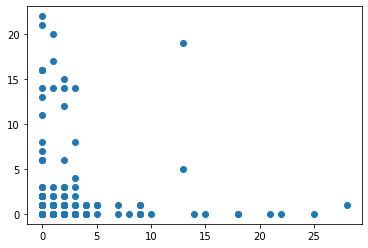

In [65]:
plt.scatter(year1['PARHES'], year2['PARHES'])
plt.show()

In [66]:
from numpy import cov
import statistics

In [67]:
statistics.variance(year1['TADBRA'])

1083.2342082682449

In [68]:
x = cov(year1['TADBRA'], year2['TADBRA'])
x

array([[1083.23420827,  236.17898396],
       [ 236.17898396, 2022.53560978]])

In [69]:
x[0][1]

236.17898396074895

In [70]:
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
covardf = pd.DataFrame()
covar = []

for i in sp:
    x = cov(year1[i], year2[i])
    covar.append(x[0][1])

covardf['species'] = sp
covardf['covariance'] = covar

In [71]:
covardf

,species,covariance
0,ANTPAL,44.738796
1,CORTOW,-0.002783
2,MYOYUM,0.029130
3,EPTFUS,1105.176377
4,LASBLO,0.145277
5,LASCIN,23.740061
6,LASNOC,56.814988
7,LASXAN,0.110251
8,MYOCIL,126.633803
9,MYOVEL,383.942312


## Correlation of two years

In [72]:
from scipy.stats import pearsonr, spearmanr

In [75]:
#Correlation of weekly avarages for two years
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
codfw = pd.DataFrame()
corwp = []
corws = []

for i in sp:
    x, p = pearsonr(y1w[i], y2w[i])
    corwp.append(x)
    pear, _ = spearmanr(y1w[i], y2w[i])
    corws.append(pear)

codfw['species'] = sp
codfw['pearson'] = corwp
codfw['spearman'] = corws

In [76]:
codfw

,species,pearson,spearman
0,ANTPAL,0.822889,0.833719
1,CORTOW,0.031095,0.063670
2,MYOYUM,0.201998,0.306456
3,EPTFUS,0.873153,0.765137
4,LASBLO,0.354615,0.362597
5,LASCIN,0.285934,0.531660
6,LASNOC,0.396765,0.443598
7,LASXAN,0.171656,0.279241
8,MYOCIL,0.708221,0.869824
9,MYOVEL,0.534659,0.879966


## Augmented Dickey-Fuller

In [77]:
from statsmodels.tsa.stattools import adfuller

In [78]:
sp = ['ANTPAL', 'CORTOW', 'MYOYUM', 'EPTFUS', 'LASBLO', 'LASCIN', 'LASNOC', 'LASXAN', 'MYOCIL', 'MYOVEL', 'MYOVOL', 'PARHES', 'TADBRA', 'Species', 'TotBatDet']
adf = pd.DataFrame()
y1 = []
y2 = []

for i in sp:
    x1 = adfuller(year1[i])
    x2 = adfuller(year2[i])
    y1.append(round(x1[1], 6))
    y2.append(round(x2[1], 6))

adf['species'] = sp
adf['year1'] = y1
adf['sig_year1'] = adf['year1'] < 0.01
adf['year2'] = y2
adf['sig_year2'] = adf['year2'] < 0.01

In [79]:
adf

,species,year1,sig_year1,year2,sig_year2
0,ANTPAL,0.007830,True,1.000000,False
1,CORTOW,0.000000,True,0.963605,False
2,MYOYUM,0.015330,False,0.699002,False
3,EPTFUS,0.999086,False,0.998720,False
4,LASBLO,0.000227,True,0.094695,False
5,LASCIN,0.001498,True,0.000140,True
6,LASNOC,0.069945,False,1.000000,False
7,LASXAN,0.279337,False,0.988083,False
8,MYOCIL,0.007950,True,0.057836,False
9,MYOVEL,0.015155,False,0.261089,False


# Conclusion

* 17 Confirmed species of bats during both years of sampling
* All bat detection count data was strongly right skewed and had non-normal distribution
* Majority of species showed no statistically significant difference in detections between two years for Mann-Whitney U test (p-value > 0.05)
* Only MYOYUM, LASBLO, and LASCIN showed statistically significant difference for number of detections between the two years (Mann-Whitney p-value < 0.05)
* Number of species, total number of bats detected, MYOVOL, MYOVEL, MYOCIL, EPTFUS, and ANTPAL had high correlation (Spearman Rank Correlation > 0.7) in detections between the two years
* MYOYUM, LASBLO, LASCIN, LASNOC, LASXAN, and TADBRA had weaker Spearman Rank Correlation (between 0.2 and 0.7)
* CORTOW and PARHES had very weak Spearman Rank Correlation (< 0.2)
* The highly variable nature of aoustic data prevents drawing large scale conclusions about differences in bat populations between year 1 and year 2 but most likely there is very little difference between the two years